# Unsupervised Learning

#### STUDY CASE : Credit Card Dataset for Clustering

In [1]:
# import necessary tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# ignore warnings
import warnings
warnings.filterwarnings(action="ignore")

# clustering
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from matplotlib import cm
from sklearn.metrics import silhouette_samples, silhouette_score

## Summary dataset description 

[- Dataset description](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata?select=CC+GENERAL.csv)

This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months.
The file is at a customer level with 18 behavioral variables.

## Goals

- Data preprocessing
- Clustering
- Feature extraction to improve clustering
- Experiment with various clustering models: KMeans, DBSCAN
- Choosing the number of clusters ( Kmean )
- Concluding the project by giving marketing strategy based on what we learn from the data

In [2]:
#Dataset 

df = pd.read_csv('Dataset/CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
#Data shape

print("Data shape:",df.shape)

Data shape: (8950, 18)


## Data Cleanning

#### Missing values analisis

<AxesSubplot:>

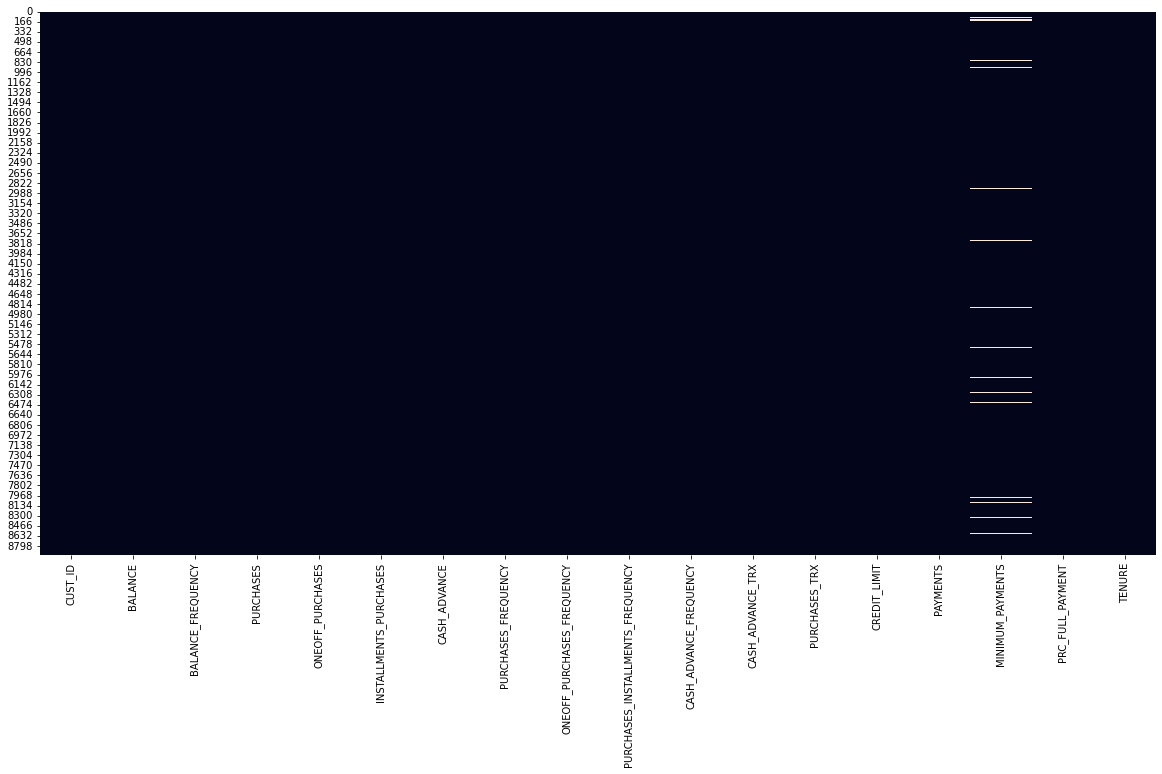

In [4]:
#NA values analisis 

plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [5]:
#NA sorted by values count 

(df.isna().sum()).sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

### Handle missing values 

In [6]:
#Replace Na with median 

df['MINIMUM_PAYMENTS'].fillna((df['MINIMUM_PAYMENTS'].median()), inplace=True)
df['CREDIT_LIMIT'].fillna((df['CREDIT_LIMIT'].median()), inplace=True)

In [7]:
(df.isna().sum()).sort_values(ascending=False)

CUST_ID                             0
BALANCE                             0
PRC_FULL_PAYMENT                    0
MINIMUM_PAYMENTS                    0
PAYMENTS                            0
CREDIT_LIMIT                        0
PURCHASES_TRX                       0
CASH_ADVANCE_TRX                    0
CASH_ADVANCE_FREQUENCY              0
PURCHASES_INSTALLMENTS_FREQUENCY    0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_FREQUENCY                 0
CASH_ADVANCE                        0
INSTALLMENTS_PURCHASES              0
ONEOFF_PURCHASES                    0
PURCHASES                           0
BALANCE_FREQUENCY                   0
TENURE                              0
dtype: int64

In [8]:
#Drop id columns 

df = df.drop('CUST_ID', axis=1)

In [9]:
df = pd.DataFrame (df, columns =df.columns)

In [10]:
#check dataset 

df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Exploratory Data Analysis

In [11]:
df = df.copy()

In [12]:
df.shape

(8950, 17)

<AxesSubplot:ylabel='None'>

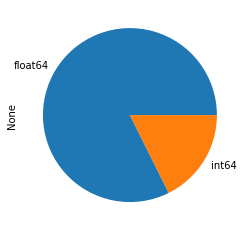

In [13]:
df.dtypes.value_counts().plot.pie()

In [14]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [15]:
df.dtypes.value_counts()

float64    14
int64       3
dtype: int64

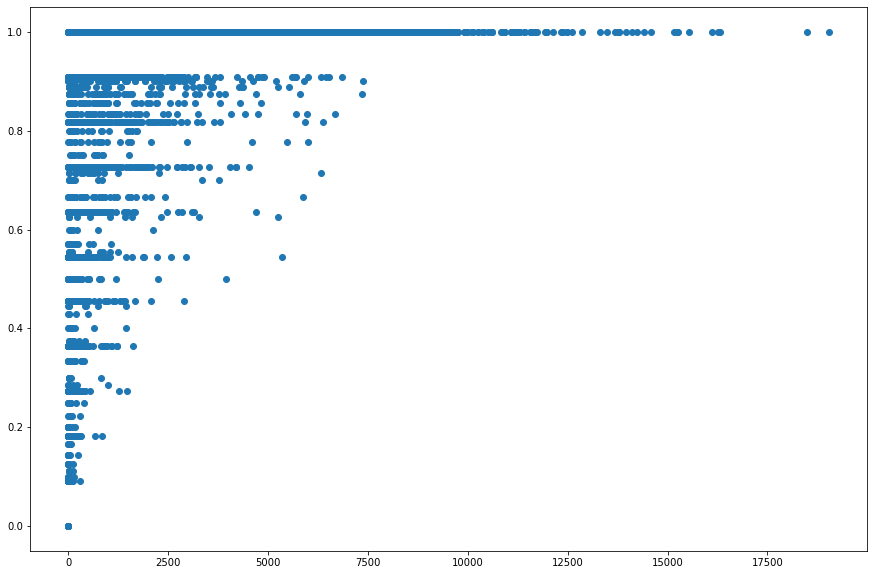

In [16]:
#Dataset plot 

plt.figure(figsize=(15,10))
plt.scatter(df.iloc[:,0], df.iloc[:,1])

## Preprosseging 

In [17]:
# Normalize values 

scaler = StandardScaler()
data_pp = scaler.fit_transform(df)

In [18]:
data_pp.shape

(8950, 17)

In [19]:
data_pp

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.3024    ,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.09749953,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.0932934 ,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32687479,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.33830497,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.3243581 ,
        -0.52555097, -4.12276757]])

In [20]:
#Convert into dataframe 

data_imputed = pd.DataFrame(data_pp, columns=df.columns)

In [21]:
data_imputed.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068


### 3.1 Clustering algorithms

In [22]:
data_imputed.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068


### 3.1.1 K-Means 

### Graphs to find optimal K for cluster size categorization

[- Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

How many cluster should we use ? The following ELBOW method "insertia_plot"  and Silhouette Graph are our indicator for decision making 

###### --- ELBOW METHOD

In [23]:
# inertia plotter function
def inertia_plot(clust, best_features, start = 2, stop = 20):
    inertia = []
    for x in range(start,stop):
        km = clust(n_clusters = x)
        labels = km.fit_predict(data_imputed)
        inertia.append(km.inertia_)
        
        #print
    plt.figure(figsize = (12,6))
    plt.plot(range(start,stop), inertia, marker = 'o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Inertia plot with K')
    plt.xticks(list(range(start, stop)))
    plt.show()

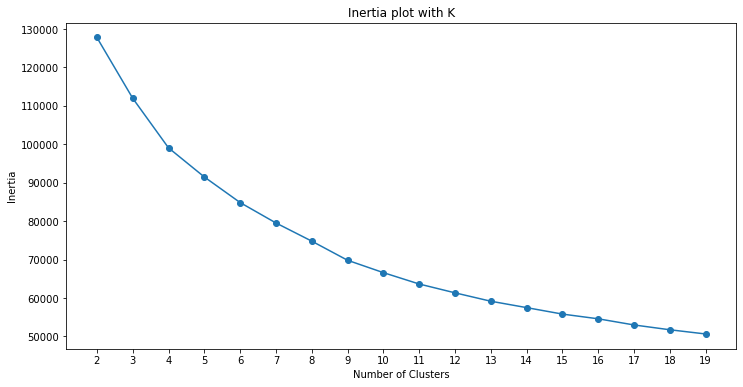

In [24]:
inertia_plot(KMeans, data_imputed)

##### --- Silhouette Graph

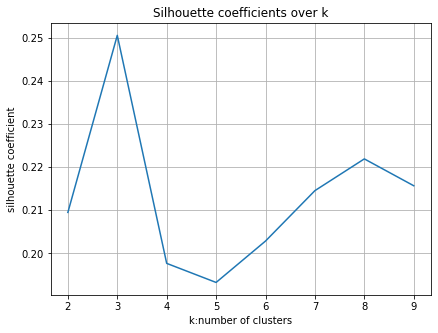

In [25]:
# Silhouette coefficient for each k, finding optimal K for cluster size categorization ( the highest value of s. score )
X = data_imputed
silhouette_plot = []
for k in range(2, 10):
    clusters = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusters.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_plot.append(silhouette_avg)
    
plt.figure(figsize=(15,5))
plt.subplot(121, title='Silhouette coefficients over k')
plt.xlabel('k:number of clusters')
plt.ylabel('silhouette coefficient')
plt.plot(range(2, 10), silhouette_plot)
plt.grid(True)

The number of cluster with the lowest silhouette coefficient is 3

## K-MEAN 

In [63]:
#Confirmation 

for x in range(2, 7):
    alg = KMeans(n_clusters = x, )
    label = alg.fit_predict(data_imputed)
    print('Silhouette-Score for', x,  'Clusters: ', silhouette_score(data_imputed, label))

Silhouette-Score for 2 Clusters:  0.2098696804804118
Silhouette-Score for 3 Clusters:  0.24982429104994963
Silhouette-Score for 4 Clusters:  0.1976911456779212
Silhouette-Score for 5 Clusters:  0.19327119581091734
Silhouette-Score for 6 Clusters:  0.20286011584987834


# Feature Extraction with PCA ( From 17 features to 2 features )

#### Clustering Metrics

Now we will apply PCA to improve clustering. We should be able to see lower inertias and higher silhouette scores after feature extraction.

Using 2 PCA components with 3 clusters

# Visualization

Text(0, 0.5, 'PC2')

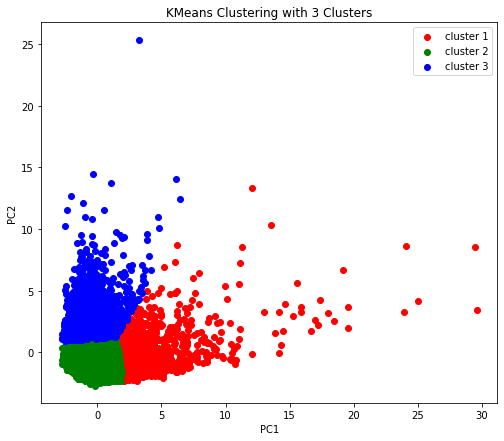

In [64]:
data_p = pd.DataFrame(PCA(n_components = 2).fit_transform(data_imputed))
preds = pd.Series(KMeans(n_clusters = 3,).fit_predict(data_p))
data_p = pd.concat([data_p, preds], axis =1)
data_p.columns = [0,1,'target']

fig = plt.figure(figsize = (18, 7))
colors = ['red', 'green', 'blue', 'purple', 'orange', 'brown']
plt.subplot(121)
plt.scatter(data_p[data_p['target']==0].iloc[:,0], data_p[data_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(data_p[data_p['target']==1].iloc[:,0], data_p[data_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(data_p[data_p['target']==2].iloc[:,0], data_p[data_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')

plt.legend()
plt.title('KMeans Clustering with 3 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')


## DB SCAN 

In [33]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

clustering = DBSCAN(eps=3, min_samples=2).fit(data_imputed)
clustering.labels_

print(clustering)

DBSCAN(eps=3, min_samples=2)


In [55]:
#Model 

db = DBSCAN(eps=0.3, min_samples=10).fit(data_imputed)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)


print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data_imputed, labels))

Estimated number of clusters: 12
Estimated number of noise points: 8414
Silhouette Coefficient: -0.399


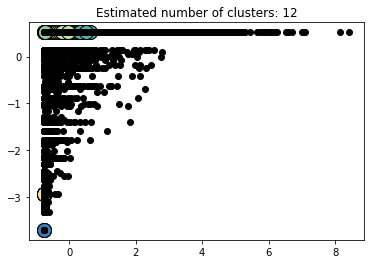

In [56]:

#Plot model 


import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

**NB:** DBSCAN is not the rigth model to implement four our dataset

# K-MEAN AND PCA and conclusions ( Simple code )

In [52]:
# Dataset reduce and feature extraction 

n_components=2

pca_final = PCA(n_components=n_components)
pca_final.fit(data_imputed)
pca_ccData = pca_final.fit_transform(data_imputed)

In [53]:
#K-mean model

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(pca_ccData)

KMeans(n_clusters=3, random_state=0)

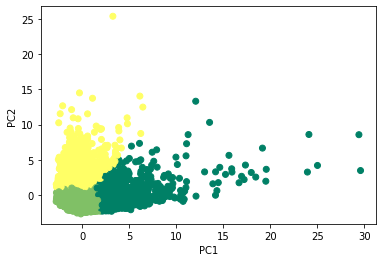

In [57]:
plt.scatter(pca_ccData[:,0], pca_ccData[:,1],
            c = KMeans(n_clusters = 3).fit_predict(pca_ccData),
            cmap = plt.cm.summer)
plt.xlabel("PC1")
plt.ylabel("PC2") # 2D dimention ( PC1 AND PC2)

plt.show() 

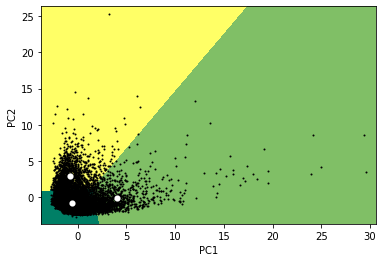

In [59]:
#Plot model 


h = .01

x_min, x_max = pca_ccData[:,0].min() - 1, pca_ccData[:,0].max() + 1
y_min, y_max = pca_ccData[:,1].min() - 1, pca_ccData[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.array(list(zip(xx.ravel(), yy.ravel()))))

Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.summer,
           aspect='auto', origin='lower')

plt.plot(pca_ccData[:,0], pca_ccData[:,1], 'k.', markersize=2)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='o', s=10, linewidths=3,
            color='w', zorder=10)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xlabel("PC1")
plt.ylabel("PC2")

plt.show()

The decision boundary is much clearer now, and we also see the center of the 3 identified clusters. Our final objective is to try and make sense of these clusters.

In [60]:
for i in np.arange(len(centroids)):
    print("Center of Cluster", i+1, ":", centroids[i])

Center of Cluster 1 : [-0.56000535 -0.76164967]
Center of Cluster 2 : [ 3.98067298 -0.11634427]
Center of Cluster 3 : [-0.80604505  2.91205336]


# Conclusions and interpretations

- Cluster 1 (Dark Green): The cluster center lies at (-0.56, -0.76). From our interpretation of the principal components, this cluster represents customers whose balances are relatively lower and are updated less frequently.

- Cluster 2 (Light Green): The cluster center lies at (3.98, -0.11). This cluster represents customers whose balances are relatively higher and are updated more frequently than the customers in Cluster 1.

- Cluster 3 (Yellow): The cluster center lies at (-0.8, 2.91). This cluster represents customers whose balances are relatively lower - very close to the balances of customers in Cluster 1 - but their balances are updated very frequently. Infact, customers in this cluster have the most frequently updated balances.